#LWR-1 Image Classification

##Step 1.2 — Verify TensorFlow Installation

In [47]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


##Step 1.3 — Load the Fashion MNIST Dataset

In [48]:
from tensorflow import keras
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Sample labels:", train_labels[:10])

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Sample labels: [9 0 0 3 0 2 7 2 5 5]


##Step 1.4 — Visualize Sample Images

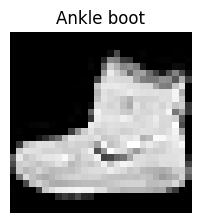

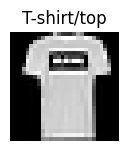

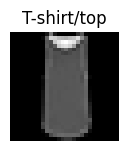

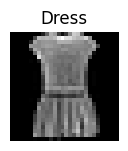

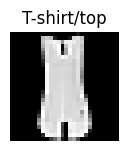

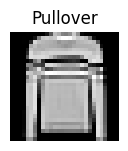

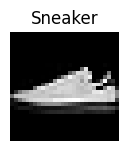

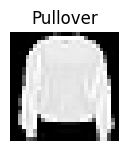

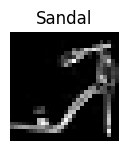

In [49]:
import matplotlib.pyplot as plt
class_names = [
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_names[train_labels[i]])
  plt.axis('off')
  plt.show()

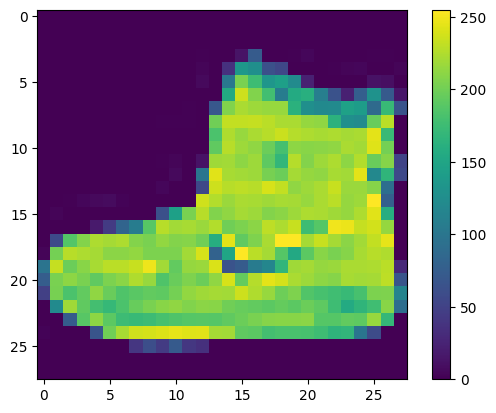

In [50]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Part 2 — Model Building, Training & Evaluation

##Step 2.1 — Normalize the Data

In [51]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

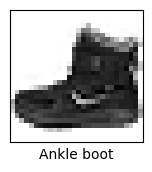

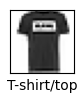

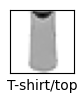

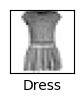

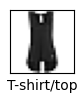

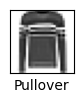

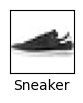

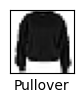

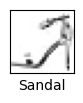

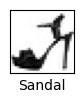

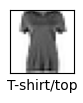

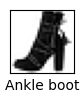

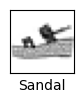

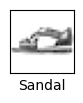

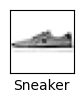

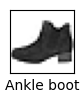

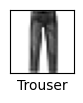

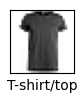

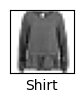

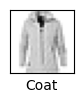

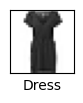

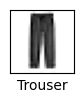

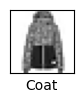

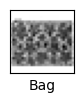

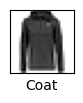

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

##Step 2.2 — Build the Neural Network Model

In [53]:
from tensorflow.keras import layers
model = keras.Sequential([
layers.Flatten(input_shape=(28, 28)),
layers.Dense(128, activation='relu'),
layers.Dense(10)
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

##Step 2.3 — Compile the Model

In [54]:
model.compile(
optimizer='adam',
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)

##Step 2.4 — Train the Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)  # Or any higher number

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7769 - loss: 0.6328
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8623 - loss: 0.3824
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8750 - loss: 0.3385
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8921 - loss: 0.2937
Epoch 6/10
 304/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8971 - loss: 0.2734

##Step 2.5 — Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

##Step 2.6 — Make Predictions

In [ ]:
import numpy as np
probability_model = keras.Sequential([
model,
layers.Softmax()
])
predictions = probability_model.predict(test_images)
print("Predicted label for first image:", np.argmax(predictions[0]))
print("Actual label:", test_labels[0])

##Step 2.7 - Define functions to graph the full set of 10 class predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],

                        100*np.max(predictions_array),
                        class_names[true_label]),
                        color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

##Step 2.8 - Verify Predictions

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

##Step 2.9 - Plot Several Images

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  plt.tight_layout()
  plt.show()

#Step 2.10 - Use the Trained Model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

#Tasks Enhancement:

###1. Change the number of neurons in the hidden layer (e.g., 64 or 256) and retrain the model.

In [ ]:
# ========== TASK ENHANCEMENT 1: Change neurons to 256 ==========

from tensorflow.keras import layers

# Step 1: Build model with 256 neurons
model_256 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),  # Changed to 256 neurons
    layers.Dense(10)
])
model_256.summary()

# Step 2: Compile the model
model_256.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Step 3: Train the model (10 epochs)
history_256 = model_256.fit(train_images, train_labels, epochs=10)

# Step 4: Evaluate the model
test_loss_256, test_acc_256 = model_256.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy with 256 neurons:", test_acc_256)

###2. Increase the number of epochs and observe changes in accuracy.

In [ ]:
# ========== TASK ENHANCEMENT 2: Increase the number of epochs ==========

# Step 1: Build a new model with original architecture (128 neurons)
model_epochs = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])
model_epochs.summary()

# Step 2: Compile the model
model_epochs.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Step 3: Train with increased epochs (20 instead of 10)
history_epochs = model_epochs.fit(train_images, train_labels, epochs=50)

# Step 4: Evaluate the model
test_loss_epochs, test_acc_epochs = model_epochs.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy with 20 epochs:", test_acc_epochs)

###3. Add another hidden layer and compare the results.

In [ ]:
# ========== TASK ENHANCEMENT 3: Add another hidden layer ==========

# Step 1: Build model with 2 hidden layers
model_layers = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),  # First hidden layer
    layers.Dense(128, activation='relu'),  # Second hidden layer (NEW!)
    layers.Dense(10)
])
model_layers.summary()

# Step 2: Compile the model
model_layers.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Step 3: Train the model (10 epochs)
history_layers = model_layers.fit(train_images, train_labels, epochs=10)

# Step 4: Evaluate the model
test_loss_layers, test_acc_layers = model_layers.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy with 2 hidden layers:", test_acc_layers)